False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
6 [[1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1. 1. 3.]
 [1. 3. 0. 3. 3. 3. 0. 0. 1. 3. 3. 3. 3. 3. 3. 3. 1. 1. 3. 3. 3. 3. 3. 3.]
 [0. 3. 0. 0. 3. 0. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 0. 0. 0. 3. 0. 0. 0. 1. 3. 3. 3. 3. 3. 3. 3. 1. 1. 3. 3. 3. 3. 3. 3.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 1. 3.]
 [1. 3. 0. 3. 3. 3. 3. 3. 1. 1. 3. 3. 1. 1. 1. 1. 3. 1. 1. 1. 3. 3. 3. 3.]]
range(0, 6)


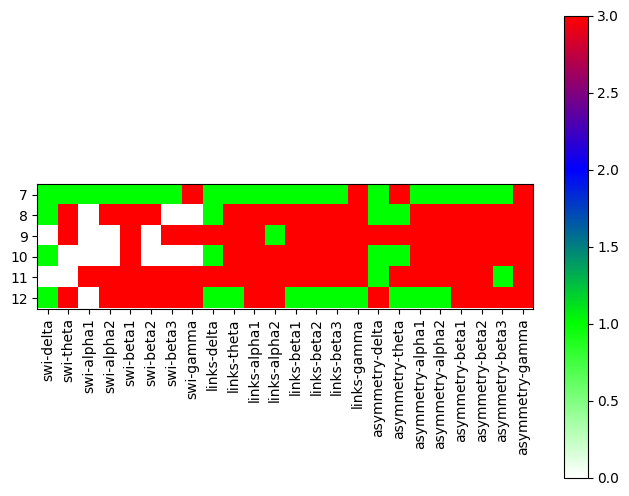

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

existing_file = "comparison-results/results.xlsx"
df = pd.read_excel(existing_file, header=[0,1])
df_without_rows = df.drop(df.index[0:len(df)//2+1])
df_without_columns = df_without_rows.drop(df_without_rows.columns[0:len(df)//2+1], axis=1)
df = df_without_columns

colors = [(1, 1, 1), (0, 1, 0), (0, 0, 1), (1, 0, 0)] # white, green, blue, red
values = [0, 1, 2, 3]
cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, N=256)

# 0 : If swi values NaN, post asymmetry == pre asymmetry == 0 (symmetric) ----- white
# 1 : If post swi > pre swi, post links > pre links, post asymmetry < pre asymmetry ----- green
# 2 : If post swi == pre swi, post links == pre links, post asymmetry == pre asymmetry ---- blue
# 3 : If post swi < pre swi, post links < pre links, post asymmetry > pre asymmetry ----- red

condition_matrix = np.zeros((len(df), (len(df.columns) -8) // 2))
for i in range(1, len(df.columns)-8, 2):
    for j in range(len(df)):
        if i in range(0,16):
            print(df.iloc[j, i] == df.iloc[j, i + 1])
            if np.isnan(df.iloc[j, i]):
                condition_matrix[j, i // 2] = 0
            elif df.iloc[j, i] < df.iloc[j, i + 1]:
                condition_matrix[j, i // 2] = 1
            elif df.iloc[j, i] == df.iloc[j, i + 1]:
                condition_matrix[j, i // 2] = 2
            else:
                condition_matrix[j, i // 2] = 3
        elif i in range(16,32):
            if df.iloc[j, i] < df.iloc[j, i + 1]:
                condition_matrix[j, i // 2] = 1
            elif df.iloc[j, i] == df.iloc[j, i + 1]:
                condition_matrix[j, i // 2] = 2
            else:
                condition_matrix[j, i // 2] = 3
        elif i in range(32,48):
            if np.abs(df.iloc[j, i] - 1) == np.abs(df.iloc[j, i+1] - 1) and np.abs(df.iloc[j, i] - 1) == 0:
                condition_matrix[j, i//2] = 0
            elif np.abs(df.iloc[j, i] - 1) > np.abs(df.iloc[j, i+1] - 1):
                condition_matrix[j, i//2] = 1
            elif np.abs(df.iloc[j, i] - 1) == np.abs(df.iloc[j, i+1] - 1):
                condition_matrix[j, i//2] = 2
            else:
                condition_matrix[j, i//2] = 3

print(len(condition_matrix), condition_matrix)
lis = [f"{df.columns[i][0]}-{df.columns[i][1].split('-')[0]}" for i in range(1, len(df.columns)-8, 2)]
print(range(len(df)))

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(condition_matrix, cmap=cmap)
plt.xticks(range(((len(df.columns)-8)// 2)), lis, rotation='vertical')
plt.yticks(range(len(df)), df.index)
plt.colorbar()
plt.show()
